Modelando  Monopoly

![Hasbro Monopoly Classic Board Game.jpeg](<attachment:Hasbro Monopoly Classic Board Game.jpeg>)
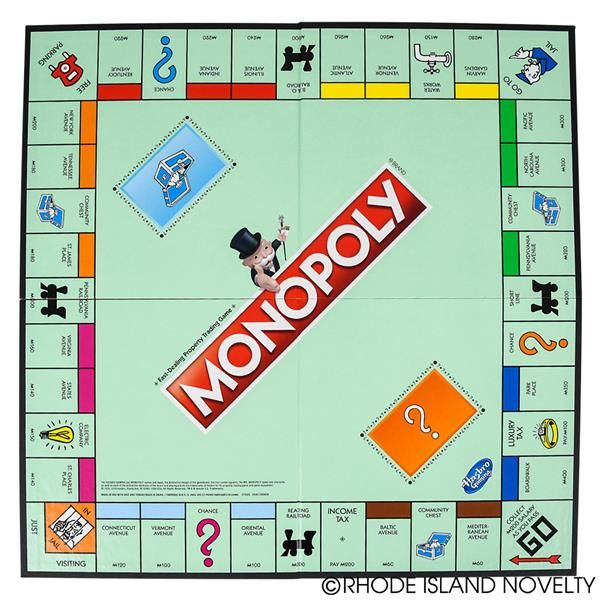

Genere una clase para casilla que tenga la informacion para casilla  

In [1]:
from IPython import get_ipython
from IPython.display import display

In [2]:
class Casilla:
    def __init__(self, nombre, tipo, costo=0, renta=0, costo_casa=0, renta_por_casa=0, costo_hotel=0, grupo=None):
        """
        Inicializa una casilla del tablero.

        :param nombre: Nombre de la casilla.
        :param tipo: Tipo de la casilla ("propiedad", "especial", "impuesto", "comunidad", etc.).
        :param costo: Costo de comprar la propiedad.
        :param renta: Renta básica de la propiedad.
        :param costo_casa: Costo de construir una casa en esta propiedad (solo para propiedades).
        :param renta_por_casa: Incremento de renta por cada casa construida.
        :param costo_hotel: Costo de construir un hotel en esta propiedad.
        :param grupo: Grupo de color al que pertenece la propiedad.
        """
        self.nombre = nombre
        self.tipo = tipo
        self.costo = costo
        self.renta = renta
        self.propietario = None
        self.casas = 0  # Número de casas construidas
        self.hoteles = 0  # Número de hoteles construidos
        self.costo_casa = costo_casa  # Costo para construir una casa
        self.renta_por_casa = renta_por_casa  # Incremento de renta por casa
        self.costo_hotel = costo_hotel  # **Nuevo: costo para construir un hotel**
        self.grupo = grupo

    def calcular_renta(self):
        """
        Calcula la renta actual de la propiedad basada en el número de casas y hoteles.

        :return: La renta actual.
        """
        if self.hoteles > 0:
            return self.renta + self.renta_por_casa * 4  # La renta con hotel puede ajustarse si lo deseas
        elif self.casas > 0:
            return self.renta + self.casas * self.renta_por_casa
        else:
            return self.renta



In [3]:
class Tablero:
    def __init__(self):
        print("Creando tablero...")
        self.casillas = self.crear_tablero()  # Llamada a crear_tablero

        # Encontrar la posición de la cárcel en la lista de casillas
        for i, casilla in enumerate(self.casillas):
            if casilla.nombre == "Cárcel / Solo de visita":
                self.posicion_carcel = i
                break
        else:
            raise ValueError("No se encontró la casilla de la cárcel en el tablero.")

    def crear_tablero(self):
        print("Inicializando las casillas...")
        return [
            Casilla("Salida", "especial"),
            Casilla("Mediterranean Avenue", "propiedad", costo=60, renta=2, costo_casa=50, renta_por_casa=10, grupo="morado"),
            Casilla("Comunidad", "comunidad"),
            Casilla("Baltic Avenue", "propiedad", costo=60, renta=4, costo_casa=50, renta_por_casa=20, grupo="morado"),
            Casilla("Impuesto sobre la renta", "impuesto", costo=200),
            Casilla("Ferrocarril Reading", "ferrocarril", costo=200, renta=25),
            Casilla("Oriental Avenue", "propiedad", costo=100, renta=6, costo_casa=50, renta_por_casa=30, grupo="celeste"),
            Casilla("Suerte", "suerte"),
            Casilla("Vermont Avenue", "propiedad", costo=100, renta=6, costo_casa=50, renta_por_casa=30, grupo="celeste"),
            Casilla("Connecticut Avenue", "propiedad", costo=120, renta=8, costo_casa=50, renta_por_casa=40, grupo="celeste"),

            # Cárcel en la posición 10
            Casilla("Cárcel / Solo de visita", "especial"),

            Casilla("St. Charles Place", "propiedad", costo=140, renta=10, costo_casa=100, renta_por_casa=50, grupo="rosado"),
            Casilla("Comunidad", "comunidad"),
            Casilla("States Avenue", "propiedad", costo=140, renta=10, costo_casa=100, renta_por_casa=50, grupo="rosado"),
            Casilla("Virginia Avenue", "propiedad", costo=160, renta=12, costo_casa=100, renta_por_casa=60, grupo="rosado"),
            Casilla("Ferrocarril Pennsylvania", "ferrocarril", costo=200, renta=25),
            Casilla("St. James Place", "propiedad", costo=180, renta=14, costo_casa=100, renta_por_casa=70, grupo="naranja"),
            Casilla("Suerte", "suerte"),
            Casilla("Tennessee Avenue", "propiedad", costo=180, renta=14, costo_casa=100, renta_por_casa=70, grupo="naranja"),
            Casilla("New York Avenue", "propiedad", costo=200, renta=16, costo_casa=100, renta_por_casa=80, grupo="naranja"),

            Casilla("Parada libre", "especial"),
            Casilla("Kentucky Avenue", "propiedad", costo=220, renta=18, costo_casa=150, renta_por_casa=90, grupo="rojo"),
            Casilla("Suerte", "suerte"),
            Casilla("Indiana Avenue", "propiedad", costo=220, renta=18, costo_casa=150, renta_por_casa=90, grupo="rojo"),
            Casilla("Illinois Avenue", "propiedad", costo=240, renta=20, costo_casa=150, renta_por_casa=100, grupo="rojo"),
            Casilla("Ferrocarril B&O", "ferrocarril", costo=200, renta=25),
            Casilla("Atlantic Avenue", "propiedad", costo=260, renta=22, costo_casa=150, renta_por_casa=110, grupo="amarillo"),
            Casilla("Ventnor Avenue", "propiedad", costo=260, renta=22, costo_casa=150, renta_por_casa=110, grupo="amarillo"),
            Casilla("Compañía de agua", "servicio", costo=150, renta=0),
            Casilla("Marvin Gardens", "propiedad", costo=280, renta=24, costo_casa=150, renta_por_casa=120, grupo="amarillo"),

            Casilla("Ve a la cárcel", "especial"),
            Casilla("Pacific Avenue", "propiedad", costo=300, renta=26, costo_casa=200, renta_por_casa=130, grupo="verde"),
            Casilla("Carolina del Norte Avenue", "propiedad", costo=300, renta=26, costo_casa=200, renta_por_casa=130, grupo="verde"),
            Casilla("Comunidad", "comunidad"),
            Casilla("Avenida Pennsylvania", "propiedad", costo=320, renta=28, costo_casa=200, renta_por_casa=150, grupo="verde"),
            Casilla("Ferrocarril Short Line", "ferrocarril", costo=200, renta=25),
            Casilla("Suerte", "suerte"),
            Casilla("Park Place", "propiedad", costo=350, renta=35, costo_casa=200, renta_por_casa=175, grupo="azul oscuro"),
            Casilla("Impuesto de lujo", "impuesto", costo=100),
            Casilla("Boardwalk", "propiedad", costo=400, renta=50, costo_casa=200, renta_por_casa=200, grupo="azul oscuro")
        ]



In [4]:
import random

class Jugador:
    def __init__(self, nombre, silencioso=True):
        self.nombre = nombre
        self.dinero = 1500
        self.propiedades = []
        self.posicion = 0
        self.en_carcel = False
        self.turnos_en_carcel = 0
        self.tiene_carta_salir_carcel = False  # Para cartas de "Salir de la cárcel"
        self.silencioso = silencioso

    def lanzar_dados(self):
        """Lanza dos dados y devuelve el resultado como una tupla."""
        return random.randint(1, 6), random.randint(1, 6)

    def mover(self, total_dados, tablero):
        """Mueve al jugador en el tablero y otorga $200 si pasa por la casilla de salida."""
        posicion_anterior = self.posicion  # Guarda la posición antes de moverse
        self.posicion = (self.posicion + total_dados) % len(tablero.casillas)
    
    # Si el jugador cayó exactamente en la casilla de salida
        if tablero.casillas[self.posicion].nombre == "Salida":
                self.dinero += 200
        if not self.silencioso:
            print(f"{self.nombre} cayó en la casilla 'Salida' y recibió $200. Nuevo saldo: {self.dinero}")
    
        return tablero.casillas[self.posicion]


    def tiene_todas_las_propiedades_del_grupo(self, grupo):
        """Verifica si el jugador tiene todas las propiedades de un grupo."""
        propiedades_grupo = [p for p in self.propiedades if p.grupo == grupo]
        total_grupo = len([p for p in tablero.casillas if p.grupo == grupo])
        return len(propiedades_grupo) == total_grupo

    def puede_construir_casa(self, propiedad):
        """Verifica si puede construir una casa."""
        return (propiedad.propietario == self and
                self.tiene_todas_las_propiedades_del_grupo(propiedad.grupo) and
                propiedad.casas < 4 and
                self.dinero >= propiedad.costo_casa)

    def construir_casa(self, propiedad):
        """Construye una casa en la propiedad si es posible."""
        if self.puede_construir_casa(propiedad):
            self.dinero -= propiedad.costo_casa
            propiedad.casas += 1
            if not self.silencioso:
                print(f"{self.nombre} construyó una casa en {propiedad.nombre}.")
        else:
            if not self.silencioso:
                print(f"{self.nombre} no puede construir una casa en {propiedad.nombre}.")

    def puede_construir_hotel(self, propiedad):
        """Verifica si puede construir un hotel."""
        return propiedad.casas == 4 and propiedad.hoteles == 0 and self.dinero >= propiedad.costo_hotel

    def construir_hotel(self, propiedad):
        """Construye un hotel en la propiedad si es posible."""
        if self.puede_construir_hotel(propiedad):
            self.dinero -= propiedad.costo_hotel
            propiedad.hoteles += 1
            propiedad.casas = 0  # Se convierten en un hotel
            if not self.silencioso:
                print(f"{self.nombre} construyó un hotel en {propiedad.nombre}.")
        else:
            if not self.silencioso:
                print(f"{self.nombre} no puede construir un hotel en {propiedad.nombre}.")

    def gestionar_carcel(self):
        """Maneja la lógica cuando un jugador está en la cárcel."""
        if self.en_carcel:
            if self.tiene_carta_salir_carcel:
                self.en_carcel = False
                self.tiene_carta_salir_carcel = False
                if not self.silencioso:
                    print(f"{self.nombre} usó una carta de 'Salir de la cárcel'.")
            elif self.dinero >= 50:  # Pago de fianza
                self.dinero -= 50
                self.en_carcel = False
                if not self.silencioso:
                    print(f"{self.nombre} pagó $50 para salir de la cárcel.")
            else:
                self.turnos_en_carcel += 1
                if self.turnos_en_carcel == 3:
                    self.en_carcel = False
                    self.turnos_en_carcel = 0
                    if not self.silencioso:
                        print(f"{self.nombre} sale de la cárcel después de 3 turnos.")

    def ejecutar_turno(self, juego):
        """Ejecuta un turno, incluyendo los dobles y la cárcel."""
        if self.en_carcel:
            self.gestionar_carcel()
            return  # Si sigue en la cárcel, no juega

        turnos_consecutivos = 0
        while True:
            dado1, dado2 = self.lanzar_dados()
            total_dados = dado1 + dado2
            if dado1 == dado2:
                turnos_consecutivos += 1
                if turnos_consecutivos == 3:
                    self.en_carcel = True
                    self.posicion = juego.tablero.obtener_posicion_carcel()
                    if not self.silencioso:
                        print(f"{self.nombre} sacó tres dobles seguidos y va a la cárcel.")
                    break

            casilla = self.mover(total_dados, juego.tablero)

            # Manejo de propiedad
            if casilla.tipo == "propiedad" and casilla.propietario is None:
                juego.comprar_propiedad(self, casilla)
            elif casilla.tipo == "propiedad" and casilla.propietario != self:
                juego.pagar_renta(self, casilla)

            # Si no sacó dobles, termina su turno
            if dado1 != dado2:
                break

In [5]:
import random

class Juego:
    def __init__(self, jugadores, tablero, silencioso=False):
        self.jugadores = jugadores
        self.tablero = tablero
        self.numero_turno = 0  # Contador de turnos
        self.silencioso = silencioso  # Control de impresiones
        self.iniciar_juego()

    def print(self, mensaje):
        """Imprime un mensaje solo si no está en modo silencioso."""
        if not self.silencioso:
            print(mensaje)

    def iniciar_juego(self):
        """Inicia el estado del juego."""
        for jugador in self.jugadores:
            jugador.dinero = 1500  # Dinero inicial
            jugador.propiedades = []  # Propiedades iniciales
            jugador.posicion = 0  # Empieza en la casilla de salida
            jugador.en_carcel = False  # No está en la cárcel al principio
            jugador.turnos_en_carcel = 0  # Contador de turnos en la cárcel
        self.numero_turno = 0  # Reinicia el contador de turnos

    def reset(self):
        """Reinicia el estado del juego a su estado inicial."""
        self.iniciar_juego()  # Llama a iniciar_juego para reiniciar todos los valores importantes
        # Resetear tablero (propiedades, casas, hoteles)
        for casilla in self.tablero.casillas:
            casilla.propietario = None
            casilla.casas = 0
            casilla.hoteles = 0

    def turno(self, jugador):
        """Ejecuta las acciones de un turno para un jugador."""
        if jugador.en_carcel:
            self.manejar_carcel(jugador)
            return  # Si estaba en la cárcel y no salió, termina su turno

        dobles_consecutivos = 0  # Contador de dobles seguidos

        while True:  # Se mantiene en el loop mientras saque dobles
            dados = jugador.lanzar_dados()
            es_doble = dados[0] == dados[1]

            if es_doble:
                dobles_consecutivos += 1
                self.print(f"{jugador.nombre} sacó dobles ({dados[0]}, {dados[1]}). ¡Juega otro turno!")

                if dobles_consecutivos == 3:
                    self.print(f"{jugador.nombre} sacó 3 dobles seguidos y va a la cárcel.")
                    jugador.en_carcel = True
                    jugador.posicion = self.tablero.posicion_carcel  # Suponiendo que hay una variable con la posición de la cárcel
                    return  # Su turno termina aquí
            else:
                dobles_consecutivos = 0  # Si no saca dobles, se resetea el contador

            casilla = jugador.mover(sum(dados), self.tablero)

            # Acciones según el tipo de casilla
            if casilla.tipo == "propiedad" and casilla.propietario is None:
                self.comprar_propiedad(jugador, casilla)
            elif casilla.tipo == "propiedad" and casilla.propietario is not jugador:
                self.pagar_renta(jugador, casilla)

            # Estrategia de construcción al final del turno
            self.evaluar_construccion(jugador)

            # Si no sacó dobles, su turno termina aquí
            if not es_doble:
                break

    def manejar_carcel(self, jugador):
        """Gestiona la lógica cuando un jugador está en la cárcel."""
        self.print(f"{jugador.nombre} está en la cárcel (Turno {jugador.turnos_en_carcel + 1}/3).")

        if jugador.dinero >= 50 and jugador.turnos_en_carcel == 2:
            # Si es su tercer turno en la cárcel, paga $50 y sale
            jugador.dinero -= 50
            jugador.en_carcel = False
            jugador.turnos_en_carcel = 0
            self.print(f"{jugador.nombre} pagó $50 y salió de la cárcel.")
        else:
            dados = jugador.lanzar_dados()
            es_doble = dados[0] == dados[1]

            if es_doble:
                jugador.en_carcel = False
                jugador.turnos_en_carcel = 0
                self.print(f"{jugador.nombre} sacó dobles y salió de la cárcel.")
                jugador.mover(sum(dados), self.tablero)  # Se mueve según los dados
            else:
                jugador.turnos_en_carcel += 1
                self.print(f"{jugador.nombre} no sacó dobles y sigue en la cárcel.")

    def comprar_propiedad(self, jugador, casilla):
        """Permite a un jugador comprar una propiedad si tiene dinero suficiente."""
        if jugador.dinero >= casilla.costo:
            jugador.dinero -= casilla.costo
            jugador.propiedades.append(casilla)
            casilla.propietario = jugador
            self.print(f"{jugador.nombre} compró {casilla.nombre} por {casilla.costo}")

    def pagar_renta(self, jugador, casilla):
        """Gestiona el pago de renta cuando un jugador cae en una propiedad ajena."""
        renta = casilla.renta
        if jugador.dinero >= renta:
            jugador.dinero -= renta
            casilla.propietario.dinero += renta
            self.print(f"{jugador.nombre} pagó {renta} a {casilla.propietario.nombre}")
        else:
            # Jugador entra en bancarrota si no puede pagar la renta
            self.print(f"{jugador.nombre} no pudo pagar la renta de {renta} y está en bancarrota")
            jugador.dinero = 0
            jugador.propiedades.clear()

    def evaluar_construccion(self, jugador):
      """Evalúa si el jugador puede construir casas u hoteles."""
      for propiedad in sorted(jugador.propiedades, key=lambda x: x.renta, reverse=True):
        if propiedad.tipo == "propiedad" and propiedad.casas < 4:
            jugador.construir_casa(propiedad)  # <-- Cambiado a jugador.construir_casa()
        elif propiedad.casas == 4 and propiedad.hoteles == 0:
            jugador.construir_hotel(propiedad)  # <-- Cambiado a jugador.construir_hotel()


    def simular(self, estrategia, num_partidas=1000):
        """Simula varias partidas con una estrategia específica."""
        resultados = []
        for i in range(num_partidas):
            if not self.silencioso:
                print(f"Simulando partida {i + 1}/{num_partidas}...")
            resultado = self.jugar_partida(estrategia)
            resultados.append(resultado)
        return sum(resultados) / len(resultados)

    def jugar_partida(self, estrategia):
        """Juega una partida completa aplicando una estrategia específica."""
        self.reset()  # Resetea el estado del juego

        turnos = 0
        while turnos < 50:  # Límite de 50 turnos
            for jugador in self.jugadores:
                if jugador.dinero <= 0:
                    continue  # Jugador eliminado
                self.turno(jugador)
                estrategia(jugador, self.tablero)  # Aplica la estrategia a cada jugador
            turnos += 1

        return max(jugador.dinero for jugador in self.jugadores)  # Retorna el dinero del ganador



In [6]:
def estrategia_basica(jugador, tablero):
    # Compra propiedades si tiene dinero suficiente
    casilla = tablero.casillas[jugador.posicion]
    if casilla.tipo == "propiedad" and casilla.propietario is None:
        if jugador.dinero >= casilla.costo:
            jugador.dinero -= casilla.costo
            jugador.propiedades.append(casilla)
            casilla.propietario = jugador


In [7]:
def estrategia_construccion(jugador, tablero):
    """Estrategia que prioriza construir casas y hoteles si es rentable y tiene todas las propiedades del grupo."""
    for propiedad in jugador.propiedades:
        if jugador.puede_construir_casa(propiedad):
            jugador.construir_casa(propiedad)
        elif jugador.puede_construir_hotel(propiedad):
            jugador.construir_hotel(propiedad)



In [8]:
def comparar_estrategias(juego, estrategias, num_partidas=1000):
    resultados = {}
    for nombre, estrategia in estrategias.items():
        print(f"Evaluando estrategia: {nombre}...")
        # Ejecuta simulación para esta estrategia
        resultado_promedio = juego.simular(estrategia, num_partidas)
        resultados[nombre] = resultado_promedio
        print(f"Resultado promedio para {nombre}: {resultado_promedio}")
    return resultados

# Estrategia básica: comprar siempre que sea posible
def estrategia_basica(jugador, tablero):
    """Compra propiedades siempre que tenga dinero suficiente."""
    for propiedad in tablero.casillas:
        if propiedad.tipo == "propiedad" and propiedad.propietario is None:
            if jugador.dinero >= propiedad.costo:
                jugador.dinero -= propiedad.costo
                jugador.propiedades.append(propiedad)
                propiedad.propietario = jugador

# Estrategia con construcción de casas y hoteles
def estrategia_construccion(jugador, tablero):
    """Compra propiedades y prioriza la construcción si es posible."""
    for propiedad in tablero.casillas:
        if propiedad.tipo == "propiedad" and propiedad.propietario is None:
            if jugador.dinero >= propiedad.costo:
                jugador.dinero -= propiedad.costo
                jugador.propiedades.append(propiedad)
                propiedad.propietario = jugador

    # Construcción de casas y hoteles
    for propiedad in sorted(jugador.propiedades, key=lambda x: x.renta, reverse=True):
        if jugador.puede_construir_casa(propiedad):
            jugador.construir_casa(propiedad)
        elif jugador.puede_construir_hotel(propiedad):
            jugador.construir_hotel(propiedad)


In [9]:
import random

# Definir una función de simulación que use una estrategia
def simular_juego(juego, estrategia, num_partidas=1000):
    total_ganancias = 0
    for _ in range(num_partidas):
        juego.reset()  # Asegura que cada simulación empiece con el juego en estado inicial
        juego.jugar(estrategia)  # Ejecución del juego con la estrategia actual
        total_ganancias += juego.obtener_ganancias()  # Puedes definir qué significa "ganancias" en tu modelo
    return total_ganancias / num_partidas  # Promedio de las ganancias por partida

In [10]:
def estrategia_optimizada(jugador, tablero):
    """Estrategia optimizada para maximizar ganancias."""
    # Comprar propiedades si son del mismo grupo y el jugador tiene suficiente dinero
    casilla_actual = tablero.casillas[jugador.posicion]
    if casilla_actual.tipo == "propiedad" and casilla_actual.propietario is None:
        grupo = [p for p in tablero.casillas if p.grupo == casilla_actual.grupo and p.tipo == "propiedad"]
        posee_todo_el_grupo = all(p.propietario == jugador or p.propietario is None for p in grupo)
        if posee_todo_el_grupo and jugador.dinero > casilla_actual.costo:
            jugador.dinero -= casilla_actual.costo
            jugador.propiedades.append(casilla_actual)
            casilla_actual.propietario = jugador
            print(f"{jugador.nombre} compró {casilla_actual.nombre}.")

    # Construir casas/hoteles en las propiedades más rentables
    propiedades_construibles = [p for p in jugador.propiedades if p.casas < 4 or (p.casas == 4 and p.hoteles == 0)]
    propiedades_construibles = sorted(propiedades_construibles, key=lambda x: x.renta, reverse=True)
    for propiedad in propiedades_construibles:
        if propiedad.casas < 4:
            costo_casa = propiedad.costo_casa
            if jugador.dinero >= costo_casa:
                jugador.dinero -= costo_casa
                propiedad.casas += 1
                propiedad.renta += propiedad.renta_por_casa
                print(f"{jugador.nombre} construyó una casa en {propiedad.nombre}.")
        elif propiedad.hoteles == 0:
            costo_hotel = propiedad.costo_casa * 2
            if jugador.dinero >= costo_hotel:
                jugador.dinero -= costo_hotel
                propiedad.hoteles += 1
                propiedad.casas = 0
                propiedad.renta += propiedad.renta_por_casa * 4
                print(f"{jugador.nombre} construyó un hotel en {propiedad.nombre}.")



Aca se generala nueva funcion para tomar los datos 

In [11]:
def simular_y_registrar(juego, estrategia, num_partidas):
    """
    Simula num_partidas partidas usando la estrategia dada y registra datos relevantes.

    Para cada partida se registra:
      - simulation_id: Número de simulación.
      - strategy: Nombre de la estrategia (usando el atributo __name__ de la función).
      - money_evolution: Evolución del dinero por turno para cada jugador.
      - properties: Las propiedades (por nombre) que posee cada jugador al finalizar la partida.
      - houses: Número total de casas construidas (por jugador).
      - hotels: Número total de hoteles construidos (por jugador).
      - winner: Nombre del jugador ganador (según el dinero final).
      - final_money: Dinero final de cada jugador.
      - termination: Razón de finalización de la partida ("bancarrota" o "límite_turnos").
    """
    registros = []
    for partida in range(num_partidas):
        juego.reset()  # Reinicia el estado del juego
        # Preparamos el diccionario para esta simulación
        registro = {
            'simulation_id': partida,
            'strategy': estrategia.__name__,
            'money_evolution': {jugador.nombre: [] for jugador in juego.jugadores},
            'properties': {jugador.nombre: [] for jugador in juego.jugadores},
            'houses': {jugador.nombre: 0 for jugador in juego.jugadores},
            'hotels': {jugador.nombre: 0 for jugador in juego.jugadores},
            'termination': None  # Se actualizará más adelante
        }
        turnos = 0
        partida_terminada = False  # Bandera para saber si se terminó por bancarrota
        # Simulamos un número máximo de turnos (por ejemplo, 50)
        while turnos < 50:
            for jugador in juego.jugadores:
                # Si el jugador ya está en bancarrota, se termina la partida
                if jugador.dinero <= 0:
                    partida_terminada = True
                    break

                # Registrar el estado antes del turno
                registro['money_evolution'][jugador.nombre].append(jugador.dinero)

                # Ejecutar el turno y aplicar la estrategia
                juego.turno(jugador)
                estrategia(jugador, juego.tablero)

                # Registrar el estado después del turno
                registro['money_evolution'][jugador.nombre].append(jugador.dinero)
                registro['properties'][jugador.nombre] = [propiedad.nombre for propiedad in jugador.propiedades]
                registro['houses'][jugador.nombre] = sum(propiedad.casas for propiedad in jugador.propiedades)
                registro['hotels'][jugador.nombre] = sum(propiedad.hoteles for propiedad in jugador.propiedades)

            # Si alguno se declaró en bancarrota, salimos de la simulación de turnos
            if any(jugador.dinero <= 0 for jugador in juego.jugadores):
                partida_terminada = True
                break

            turnos += 1

        # Definir la razón de terminación
        if partida_terminada:
            registro['termination'] = 'bancarrota'
        else:
            registro['termination'] = 'límite_turnos'

        # Determinar el ganador: se asume que el ganador es el que tenga mayor dinero al final
        ganador = max(juego.jugadores, key=lambda j: j.dinero).nombre
        registro['winner'] = ganador
        registro['final_money'] = {jugador.nombre: jugador.dinero for jugador in juego.jugadores}
        registros.append(registro)
    return registros

# Ejemplo de uso

# Crear el tablero de Monopoly
tablero = Tablero()

# Crear los jugadores
jugadores = [Jugador("Jugador 1"), Jugador("Jugador 2"), Jugador("Jugador 3"), Jugador("Jugador 4")]

# Crear el juego
juego = Juego(jugadores, tablero)

# Verificar si estrategia_basica está definida
if 'estrategia_basica' not in globals():
    raise NameError("La estrategia 'estrategia_basica' no está definida. Asegúrate de declararla antes.")


datos_simulacion = simular_y_registrar(juego, estrategia_basica, num_partidas=1000)
# Ahora, "datos_simulacion" es una lista de diccionarios con la información de cada partida.


Creando tablero...
Inicializando las casillas...
Jugador 1 compró Oriental Avenue por 100
Jugador 4 pagó 6 a Jugador 1
Jugador 2 pagó 14 a Jugador 1
Jugador 3 pagó 12 a Jugador 1
Jugador 4 pagó 10 a Jugador 1
Jugador 4 pagó 12 a Jugador 1
Jugador 1 no pudo pagar la renta de 18 y está en bancarrota
Jugador 3 sacó dobles (3, 3). ¡Juega otro turno!
Jugador 1 compró Connecticut Avenue por 120
Jugador 2 pagó 6 a Jugador 1
Jugador 3 pagó 6 a Jugador 1
Jugador 4 pagó 8 a Jugador 1
Jugador 4 pagó 14 a Jugador 1
Jugador 3 pagó 18 a Jugador 2
Jugador 4 pagó 22 a Jugador 2
Jugador 1 pagó 26 a Jugador 3
Jugador 3 no pudo pagar la renta de 50 y está en bancarrota
Jugador 1 sacó dobles (2, 2). ¡Juega otro turno!
Jugador 1 sacó dobles (3, 3). ¡Juega otro turno!
Jugador 3 pagó 8 a Jugador 1
Jugador 4 pagó 4 a Jugador 1
Jugador 1 sacó dobles (1, 1). ¡Juega otro turno!
Jugador 1 pagó 22 a Jugador 2
Jugador 4 pagó 6 a Jugador 1
Jugador 1 no pudo pagar la renta de 26 y está en bancarrota
Jugador 3 pagó 20

In [12]:
# Ver el resultado
print("Se han registrado", len(datos_simulacion), "partidas simuladas.")

Se han registrado 1000 partidas simuladas.


In [13]:
def simular_y_registrar(juego, estrategia, num_partidas):
    """
    Simula num_partidas partidas usando la estrategia dada y registra datos relevantes.

    Para cada partida se registra:
      - simulation_id: Número de simulación.
      - strategy: Nombre de la estrategia (usando el atributo __name__ de la función).
      - money_evolution: Evolución del dinero por turno para cada jugador.
      - properties: Las propiedades (por nombre) que posee cada jugador al finalizar la partida.
      - houses: Número total de casas construidas (por jugador).
      - hotels: Número total de hoteles construidos (por jugador).
      - winner: Nombre del jugador ganador (según el dinero final).
      - final_money: Dinero final de cada jugador.
      - termination: Razón de finalización de la partida ("bancarrota" o "límite_turnos").
    """
    registros = []
    for partida in range(num_partidas):
        juego.reset()  # Reinicia el estado del juego
        # Preparamos el diccionario para esta simulación
        registro = {
            'simulation_id': partida,
            'strategy': estrategia.__name__,
            'money_evolution': {jugador.nombre: [] for jugador in juego.jugadores},
            'properties': {jugador.nombre: [] for jugador in juego.jugadores},
            'houses': {jugador.nombre: 0 for jugador in juego.jugadores},
            'hotels': {jugador.nombre: 0 for jugador in juego.jugadores},
            'termination': None  # Se actualizará más adelante
        }
        turnos = 0
        partida_terminada = False  # Bandera para saber si se terminó por bancarrota
        # Simulamos un número máximo de turnos (por ejemplo, 50)
        while turnos < 50:
            for jugador in juego.jugadores:
                # Si el jugador ya está en bancarrota, se termina la partida
                if jugador.dinero <= 0:
                    partida_terminada = True
                    break

                # Registrar el estado antes del turno
                registro['money_evolution'][jugador.nombre].append(jugador.dinero)

                # Ejecutar el turno y aplicar la estrategia
                juego.turno(jugador)
                estrategia(jugador, juego.tablero)

                # Registrar el estado después del turno
                registro['money_evolution'][jugador.nombre].append(jugador.dinero)
                registro['properties'][jugador.nombre] = [propiedad.nombre for propiedad in jugador.propiedades]
                registro['houses'][jugador.nombre] = sum(propiedad.casas for propiedad in jugador.propiedades)
                registro['hotels'][jugador.nombre] = sum(propiedad.hoteles for propiedad in jugador.propiedades)

            # Si alguno se declaró en bancarrota, salimos de la simulación de turnos
            if any(jugador.dinero <= 0 for jugador in juego.jugadores):
                partida_terminada = True
                break

            turnos += 1

        # Definir la razón de terminación
        if partida_terminada:
            registro['termination'] = 'bancarrota'
        else:
            registro['termination'] = 'límite_turnos'

        # Determinar el ganador: se asume que el ganador es el que tenga mayor dinero al final
        ganador = max(juego.jugadores, key=lambda j: j.dinero).nombre
        registro['winner'] = ganador
        registro['final_money'] = {jugador.nombre: jugador.dinero for jugador in juego.jugadores}
        registros.append(registro)
    return registros

# Ejemplo de uso

# Crear el tablero de Monopoly
tablero = Tablero()

# Crear los jugadores
jugadores = [Jugador("Jugador 1"), Jugador("Jugador 2"), Jugador("Jugador 3"), Jugador("Jugador 4")]

# Crear el juego
juego = Juego(jugadores, tablero)

# Verificar si estrategia_basica está definida
if 'estrategia_basica' not in globals():
    raise NameError("La estrategia 'estrategia_basica' no está definida. Asegúrate de declararla antes.")


datos_simulacion2 = simular_y_registrar(juego, estrategia_construccion, num_partidas=1000)
# Ahora, "datos_simulacion" es una lista de diccionarios con la información de cada partida.


Creando tablero...
Inicializando las casillas...
Jugador 1 compró Oriental Avenue por 100
Jugador 2 pagó 6 a Jugador 1
Jugador 2 pagó 12 a Jugador 1
Jugador 3 pagó 10 a Jugador 1
Jugador 4 pagó 10 a Jugador 1
Jugador 2 no pudo pagar la renta de 16 y está en bancarrota
Jugador 3 sacó dobles (3, 3). ¡Juega otro turno!
Jugador 3 pagó 18 a Jugador 2
Jugador 4 pagó 18 a Jugador 2
Jugador 3 sacó dobles (3, 3). ¡Juega otro turno!
Jugador 3 no pudo pagar la renta de 22 y está en bancarrota
Jugador 1 compró St. Charles Place por 140
Jugador 2 pagó 8 a Jugador 1
Jugador 3 pagó 4 a Jugador 1
Jugador 1 sacó dobles (4, 4). ¡Juega otro turno!
Jugador 4 sacó dobles (6, 6). ¡Juega otro turno!
Jugador 4 sacó dobles (1, 1). ¡Juega otro turno!
Jugador 4 pagó 16 a Jugador 1
Jugador 4 pagó 20 a Jugador 2
Jugador 1 pagó 26 a Jugador 3
Jugador 3 pagó 16 a Jugador 1
Jugador 4 pagó 22 a Jugador 2
Jugador 1 no pudo pagar la renta de 50 y está en bancarrota
Jugador 4 pagó 28 a Jugador 3
Jugador 2 pagó 16 a Jugad

In [14]:
# Ver el resultado
print("Se han registrado", len(datos_simulacion2), "partidas simuladas.")

Se han registrado 1000 partidas simuladas.


In [15]:
def simular_y_registrar(juego, estrategia, num_partidas):
    """
    Simula num_partidas partidas usando la estrategia dada y registra datos relevantes.

    Para cada partida se registra:
      - simulation_id: Número de simulación.
      - strategy: Nombre de la estrategia (usando el atributo __name__ de la función).
      - money_evolution: Evolución del dinero por turno para cada jugador.
      - properties: Las propiedades (por nombre) que posee cada jugador al finalizar la partida.
      - houses: Número total de casas construidas (por jugador).
      - hotels: Número total de hoteles construidos (por jugador).
      - winner: Nombre del jugador ganador (según el dinero final).
      - final_money: Dinero final de cada jugador.
      - termination: Razón de finalización de la partida ("bancarrota" o "límite_turnos").
    """
    registros = []
    for partida in range(num_partidas):
        juego.reset()  # Reinicia el estado del juego
        # Preparamos el diccionario para esta simulación
        registro = {
            'simulation_id': partida,
            'strategy': estrategia.__name__,
            'money_evolution': {jugador.nombre: [] for jugador in juego.jugadores},
            'properties': {jugador.nombre: [] for jugador in juego.jugadores},
            'houses': {jugador.nombre: 0 for jugador in juego.jugadores},
            'hotels': {jugador.nombre: 0 for jugador in juego.jugadores},
            'termination': None  # Se actualizará más adelante
        }
        turnos = 0
        partida_terminada = False  # Bandera para saber si se terminó por bancarrota
        # Simulamos un número máximo de turnos (por ejemplo, 50)
        while turnos < 50:
            for jugador in juego.jugadores:
                # Si el jugador ya está en bancarrota, se termina la partida
                if jugador.dinero <= 0:
                    partida_terminada = True
                    break

                # Registrar el estado antes del turno
                registro['money_evolution'][jugador.nombre].append(jugador.dinero)

                # Ejecutar el turno y aplicar la estrategia
                juego.turno(jugador)
                estrategia(jugador, juego.tablero)

                # Registrar el estado después del turno
                registro['money_evolution'][jugador.nombre].append(jugador.dinero)
                registro['properties'][jugador.nombre] = [propiedad.nombre for propiedad in jugador.propiedades]
                registro['houses'][jugador.nombre] = sum(propiedad.casas for propiedad in jugador.propiedades)
                registro['hotels'][jugador.nombre] = sum(propiedad.hoteles for propiedad in jugador.propiedades)

            # Si alguno se declaró en bancarrota, salimos de la simulación de turnos
            if any(jugador.dinero <= 0 for jugador in juego.jugadores):
                partida_terminada = True
                break

            turnos += 1

        # Definir la razón de terminación
        if partida_terminada:
            registro['termination'] = 'bancarrota'
        else:
            registro['termination'] = 'límite_turnos'

        # Determinar el ganador: se asume que el ganador es el que tenga mayor dinero al final
        ganador = max(juego.jugadores, key=lambda j: j.dinero).nombre
        registro['winner'] = ganador
        registro['final_money'] = {jugador.nombre: jugador.dinero for jugador in juego.jugadores}
        registros.append(registro)
    return registros

# Ejemplo de uso

# Crear el tablero de Monopoly
tablero = Tablero()

# Crear los jugadores
jugadores = [Jugador("Jugador 1"), Jugador("Jugador 2"), Jugador("Jugador 3"), Jugador("Jugador 4")]

# Crear el juego
juego = Juego(jugadores, tablero)

# Verificar si estrategia_basica está definida
if 'estrategia_basica' not in globals():
    raise NameError("La estrategia 'estrategia_basica' no está definida. Asegúrate de declararla antes.")


datos_simulacion3 = simular_y_registrar(juego, estrategia_optimizada, num_partidas=1000)
# Ahora, "datos_simulacion" es una lista de diccionarios con la información de cada partida.


Creando tablero...
Inicializando las casillas...
Jugador 1 compró Vermont Avenue por 100
Jugador 1 construyó una casa en Vermont Avenue.
Jugador 2 pagó 36 a Jugador 1
Jugador 3 pagó 36 a Jugador 1
Jugador 4 compró Baltic Avenue por 60
Jugador 4 construyó una casa en Baltic Avenue.
Jugador 1 sacó dobles (3, 3). ¡Juega otro turno!
Jugador 1 compró Virginia Avenue por 160
Jugador 1 construyó una casa en Vermont Avenue.
Jugador 1 construyó una casa en Virginia Avenue.
Jugador 2 pagó 72 a Jugador 1
Jugador 3 compró St. Charles Place por 140
Jugador 3 construyó una casa en St. Charles Place.
Jugador 4 compró Connecticut Avenue por 120
Jugador 4 construyó una casa en Baltic Avenue.
Jugador 4 construyó una casa en Connecticut Avenue.
Jugador 1 compró Ventnor Avenue por 260
Jugador 1 construyó una casa en Virginia Avenue.
Jugador 1 construyó una casa en Vermont Avenue.
Jugador 1 construyó una casa en Ventnor Avenue.
Jugador 2 compró New York Avenue por 200
Jugador 2 construyó una casa en New Yo

In [16]:
# Ver el resultado
print("Se han registrado", len(datos_simulacion3), "partidas simuladas.")

Se han registrado 1000 partidas simuladas.


Red neuronal 

In [51]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Ejemplo: Extraer características resumidas de los registros
def extraer_features_y_labels(registros):
    """
    A partir de la lista de registros (cada uno es un diccionario), construye un DataFrame
    con algunas características relevantes y la etiqueta (1 si gana Jugador 1, 0 de lo contrario).
    """
    data = []
    for reg in registros:
        # Por ejemplo, extraer el número total de propiedades, casas y hoteles de cada jugador al final
        final_money = reg['final_money']
        properties = reg['properties']
        houses = reg['houses']
        hotels = reg['hotels']

        # Para simplificar, asumo que hay dos jugadores: "Jugador 1" y "Jugador 2"
        fila = {
            'properties_player1': len(properties.get('Jugador 1', [])),
            'houses_player1': houses.get('Jugador 1', 0),
            'hotels_player1': hotels.get('Jugador 1', 0),
            'properties_player2': len(properties.get('Jugador 2', [])),
            'houses_player2': houses.get('Jugador 2', 0),
            'hotels_player2': hotels.get('Jugador 2', 0),
            # Etiqueta: 1 si Jugador 1 es el ganador, 0 en otro caso
            'winner': 1 if reg['winner'] == 'Jugador 1' else 0,
            # También puedes incluir diferencias en dinero final, etc.
            'money_diff': final_money.get('Jugador 1', 0) - final_money.get('Jugador 2', 0)
        }
        data.append(fila)
    df = pd.DataFrame(data)
    return df

# Extraer el DataFrame a partir de los datos de simulación
df_simulacion = extraer_features_y_labels(datos_simulacion)

# Seleccionar características (features) y etiqueta (label)
# En este ejemplo usamos los conteos de propiedades, casas y hoteles
features = df_simulacion[['properties_player1', 'houses_player1', 'hotels_player1',
                          'properties_player2', 'houses_player2', 'hotels_player2']].values
# Etiqueta: 1 si Jugador 1 gana, 0 si gana Jugador 2
labels = df_simulacion['winner'].values

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Construir la red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Salida para clasificación binaria

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print("Precisión en test:", accuracy)

C:\Users\57314\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7617 - loss: 0.5274 - val_accuracy: 1.0000 - val_loss: 0.0937
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9989 - loss: 0.0785 - val_accuracy: 1.0000 - val_loss: 0.0764
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9989 - loss: 0.0534 - val_accuracy: 1.0000 - val_loss: 0.0665
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9998 - loss: 0.0421 - val_accuracy: 1.0000 - val_loss: 0.0569
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9996 - loss: 0.0431 - val_accuracy: 1.0000 - val_loss: 0.0468
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9992 - loss: 0.0323 - val_accuracy: 1.0000 - val_loss: 0.0380
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9982 - loss: 0.0305 - val_accuracy: 1.0000 - val_loss: 0.0303
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9991 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss

Red para 4 jugadores 

In [52]:
def extraer_features_y_labels_4jugadores(registros):
    """
    A partir de la lista de registros (cada uno es un diccionario), construye un DataFrame
    con algunas características relevantes para 4 jugadores y la etiqueta (winner) codificada de 0 a 3.
    Se asume que en cada partida existen 4 jugadores: 'Jugador 1', 'Jugador 2', 'Jugador 3' y 'Jugador 4'.
    """
    data = []
    for reg in registros:
        final_money = reg['final_money']
        properties = reg['properties']
        houses = reg['houses']
        hotels = reg['hotels']

        fila = {
            'properties_player1': len(properties.get('Jugador 1', [])),
            'houses_player1': houses.get('Jugador 1', 0),
            'hotels_player1': hotels.get('Jugador 1', 0),
            'properties_player2': len(properties.get('Jugador 2', [])),
            'houses_player2': houses.get('Jugador 2', 0),
            'hotels_player2': hotels.get('Jugador 2', 0),
            'properties_player3': len(properties.get('Jugador 3', [])),
            'houses_player3': houses.get('Jugador 3', 0),
            'hotels_player3': hotels.get('Jugador 3', 0),
            'properties_player4': len(properties.get('Jugador 4', [])),
            'houses_player4': houses.get('Jugador 4', 0),
            'hotels_player4': hotels.get('Jugador 4', 0),
            # Etiqueta: 0 para Jugador 1, 1 para Jugador 2, 2 para Jugador 3, 3 para Jugador 4
            'winner': (0 if reg['winner'] == 'Jugador 1' else
                       1 if reg['winner'] == 'Jugador 2' else
                       2 if reg['winner'] == 'Jugador 3' else 3),
            # Puedes incluir otras variables, por ejemplo, diferencias de dinero entre jugadores
            'money_diff_1_2': final_money.get('Jugador 1', 0) - final_money.get('Jugador 2', 0)
        }
        data.append(fila)
    df = pd.DataFrame(data)
    return df


In [53]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Extraer el DataFrame a partir de los datos de simulación para 4 jugadores
df_simulacion = extraer_features_y_labels_4jugadores(datos_simulacion)

# Separar características (features) y etiquetas (labels)
# Eliminamos la columna 'winner' para obtener las features
features = df_simulacion.drop('winner', axis=1).values
labels = df_simulacion['winner'].values

# Convertir las etiquetas a formato one-hot (4 clases)
labels_cat = to_categorical(labels, num_classes=4)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels_cat, test_size=0.2, random_state=42)

# Construir la red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 salidas para 4 clases

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print("Precisión en test:", accuracy)


C:\Users\57314\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9370 - loss: 0.6387 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9973 - loss: 0.5668 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9998 - loss: 0.0465 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9997 - loss: 0.0426 - val_accuracy: 0.9937 - val_loss: 0.0320
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9830 - loss: 0.4742 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9999 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9942 - loss: 0.1937 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9941 - loss: 0.2061 - val_accuracy: 1.0000 - val_los

Este es un desarrollo de optimizacion estocastica 

In [54]:
import numpy as np
import pandas as pd
!pip install pulp
import pulp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# =============================================================================
# 2. EXTRACCIÓN DE CARACTERÍSTICAS PARA 4 JUGADORES
# =============================================================================

def extraer_features_y_labels_4jugadores(registros):
    """
    Construye un DataFrame con características relevantes y la etiqueta (winner) codificada de 0 a 3.
    Se asume que en cada partida hay 4 jugadores: 'Jugador 1', 'Jugador 2', 'Jugador 3' y 'Jugador 4'.
    """
    data = []
    for reg in registros:
        final_money = reg['final_money']
        properties = reg['properties']
        houses = reg['houses']
        hotels = reg['hotels']

        fila = {
            'properties_player1': len(properties.get('Jugador 1', [])),
            'houses_player1': houses.get('Jugador 1', 0),
            'hotels_player1': hotels.get('Jugador 1', 0),
            'properties_player2': len(properties.get('Jugador 2', [])),
            'houses_player2': houses.get('Jugador 2', 0),
            'hotels_player2': hotels.get('Jugador 2', 0),
            'properties_player3': len(properties.get('Jugador 3', [])),
            'houses_player3': houses.get('Jugador 3', 0),
            'hotels_player3': hotels.get('Jugador 3', 0),
            'properties_player4': len(properties.get('Jugador 4', [])),
            'houses_player4': houses.get('Jugador 4', 0),
            'hotels_player4': hotels.get('Jugador 4', 0),
            'winner': (0 if reg['winner'] == 'Jugador 1' else
                       1 if reg['winner'] == 'Jugador 2' else
                       2 if reg['winner'] == 'Jugador 3' else 3),
            'money_diff_1_2': final_money.get('Jugador 1', 0) - final_money.get('Jugador 2', 0)
        }
        data.append(fila)
    df = pd.DataFrame(data)
    return df

# =============================================================================
# 3. CAÍDA DE DADOS: MODELO DE CADENA DE MARKOV
# =============================================================================

def calcular_matriz_transicion(tablero):
    """
    Calcula la matriz de transición para el tablero basándose en la probabilidad
    de la suma de dos dados (simplificado, sin considerar dobles ni reglas complejas adicionales).
    Se incorporan algunas reglas especiales, por ejemplo, si se cae en "Ve a la cárcel",
    se redirige a la casilla de la cárcel.
    """
    N = len(tablero.casillas)
    # Distribución de la suma de dos dados (2 a 12)
    prob_sum = {2:1/36, 3:2/36, 4:3/36, 5:4/36, 6:5/36, 7:6/36,
                8:5/36, 9:4/36, 10:3/36, 11:2/36, 12:1/36}
    P = np.zeros((N, N))
    for i in range(N):
        for s, p in prob_sum.items():
            j = (i + s) % N
            # Si la casilla destino es "Ve a la cárcel", redirige a la posición de la cárcel.
            if tablero.casillas[j].nombre == "Ve a la cárcel":
                jail = tablero.posicion_carcel  # Se asume que este atributo ya está definido en Tablero.
                P[i, jail] += p
            else:
                P[i, j] += p
    return P

def calcular_estacionaria(P, tol=1e-8, max_iter=10000):
    """
    Calcula la distribución estacionaria de la matriz de transición P.
    """
    N = P.shape[0]
    v = np.ones(N) / N
    for _ in range(max_iter):
        v_next = v @ P
        if np.linalg.norm(v_next - v) < tol:
            break
        v = v_next
    return v



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\57314\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
# 4. OPTIMIZACIÓN DE ASIGNACIÓN CON MARKOV (PuLP)
# =============================================================================

def optimizacion_monopoly(tablero, dinero_total=1500):
    """
    Plantea y resuelve un modelo de optimización que asigna el presupuesto (dinero_total)
    a la compra de propiedades y construcción (casas/hotel) en base a los parámetros de cada casilla.

    Se incorpora la probabilidad estacionaria (calculada mediante una cadena de Markov)
    para ponderar la función objetivo, de forma que se prioricen aquellas propiedades
    en las que es más probable caer.
    """
    # Filtrar las casillas de tipo "propiedad"
    propiedades = [casilla for casilla in tablero.casillas if casilla.tipo == "propiedad"]
    num_propiedades = len(propiedades)

    # Obtener la posición de cada propiedad en el tablero
    indices = [tablero.casillas.index(casilla) for casilla in propiedades]

    # Calcular la matriz de transición y la distribución estacionaria
    P = calcular_matriz_transicion(tablero)
    estacionaria = calcular_estacionaria(P)

    # Crear el modelo de optimización
    modelo = pulp.LpProblem("Optimización_Monopoly", pulp.LpMaximize)

    # Variables de decisión:
    # x[i]: 1 si se compra la propiedad i, 0 en caso contrario.
    x = {i: pulp.LpVariable(f"x_{i}", cat="Binary") for i in range(num_propiedades)}
    # y[i]: número de casas a construir en la propiedad i (0 a 4)
    y = {i: pulp.LpVariable(f"y_{i}", lowBound=0, upBound=4, cat="Integer") for i in range(num_propiedades)}
    # z[i]: 1 si se construye un hotel en la propiedad i, 0 en caso contrario.
    z = {i: pulp.LpVariable(f"z_{i}", cat="Binary") for i in range(num_propiedades)}

    # Función objetivo: Maximizar la renta esperada ponderada por la probabilidad estacionaria
    modelo += pulp.lpSum([
        estacionaria[indices[i]] * (propiedades[i].renta +
                                    y[i] * propiedades[i].renta_por_casa +
                                    z[i] * 4 * propiedades[i].renta_por_casa) * x[i]
        for i in range(num_propiedades)
    ])

    # Restricción presupuestaria: La suma de los costos de compra y construcción no debe superar el dinero_total.
    modelo += (
        pulp.lpSum([propiedades[i].costo * x[i] for i in range(num_propiedades)]) +
        pulp.lpSum([propiedades[i].costo_casa * y[i] for i in range(num_propiedades)]) +
        pulp.lpSum([propiedades[i].costo_hotel * z[i] for i in range(num_propiedades)])
        <= dinero_total
    )

    # Restricciones adicionales:
    for i in range(num_propiedades):
        # Solo se pueden construir casas si se ha comprado la propiedad.
        modelo += y[i] <= 4 * x[i]
        # Para construir un hotel se requiere haber construido las 4 casas (restricción simplificada).
        modelo += z[i] <= y[i] / 4.0

    # Resolver el modelo
    modelo.solve()
    print("Estado del modelo:", pulp.LpStatus[modelo.status])
    print("Estrategia óptima propuesta (ponderada por probabilidad de aterrizaje):")
    resultados = []
    for i in range(num_propiedades):
        print(f"Propiedad: {propiedades[i].nombre}")
        print(f"  Comprar: {pulp.value(x[i])}")
        print(f"  Casas: {pulp.value(y[i])}")
        print(f"  Hotel: {pulp.value(z[i])}")
        print("---------------------------------")
        resultados.append({
            'nombre': propiedades[i].nombre,
            'comprar': pulp.value(x[i]),
            'casas': pulp.value(y[i]),
            'hotel': pulp.value(z[i])
        })
    return resultados

# =============================================================================
# 5. EJEMPLO DE USO INTEGRADO CON 4 JUGADORES
# =============================================================================

# Se asume que las clases Tablero, Jugador, Juego y la función estrategia_basica están definidas.

# Crear el tablero (asegúrate de que Tablero, al inicializar, defina 'posicion_carcel')
tablero = Tablero()

# Crear 4 jugadores
jugadores = [
    Jugador("Jugador 1"),
    Jugador("Jugador 2"),
    Jugador("Jugador 3"),
    Jugador("Jugador 4")
]

# Crear la instancia del juego
juego = Juego(jugadores, tablero)

# Generar datos de simulación usando la estrategia básica (o la que prefieras)
num_partidas = 1000
datos_simulacion = simular_y_registrar(juego, estrategia_basica, num_partidas)
print("Simulación completada. Se han registrado", len(datos_simulacion), "partidas.")

# Extraer el DataFrame para análisis (para 4 jugadores)
df_simulacion = extraer_features_y_labels_4jugadores(datos_simulacion)
print("Resumen de datos extraídos:")
print(df_simulacion.describe())

# (Opcional) Guardar el DataFrame en un archivo CSV para análisis externo:
# df_simulacion.to_csv("datos_simulacion_4jugadores.csv", index=False)

# Ejecutar la optimización de asignación de recursos (ahora ponderada por la probabilidad estacionaria)
print("\nEjecutando optimización de asignación de recursos en el tablero...")
resultados_optimizacion = optimizacion_monopoly(tablero, dinero_total=1500)
print("Estrategia óptima sugerida:")
for r in resultados_optimizacion:
    print(r)


Creando tablero...
Inicializando las casillas...
Jugador 3 sacó dobles (2, 2). ¡Juega otro turno!
Jugador 4 sacó dobles (4, 4). ¡Juega otro turno!
Jugador 4 pagó 20 a Jugador 2
Jugador 4 pagó 26 a Jugador 3
Jugador 4 sacó dobles (5, 5). ¡Juega otro turno!
Jugador 3 sacó dobles (1, 1). ¡Juega otro turno!
Jugador 4 pagó 24 a Jugador 2
Jugador 2 pagó 10 a Jugador 1
Jugador 3 pagó 10 a Jugador 1
Jugador 2 pagó 14 a Jugador 1
Jugador 3 sacó dobles (5, 5). ¡Juega otro turno!
Jugador 3 pagó 18 a Jugador 2
Jugador 4 sacó dobles (6, 6). ¡Juega otro turno!
Jugador 4 pagó 10 a Jugador 1
Jugador 4 pagó 14 a Jugador 1
Jugador 1 no pudo pagar la renta de 22 y está en bancarrota
Jugador 3 pagó 6 a Jugador 1
Jugador 4 pagó 18 a Jugador 2
Jugador 3 pagó 14 a Jugador 1
Jugador 2 pagó 8 a Jugador 1
Jugador 3 no pudo pagar la renta de 22 y está en bancarrota
Jugador 4 sacó dobles (2, 2). ¡Juega otro turno!
Jugador 4 pagó 8 a Jugador 1
Jugador 1 compró Connecticut Avenue por 120
Jugador 3 pagó 6 a Jugador 

TypeError: Non-constant expressions cannot be multiplied